## Ejercicio: Construir un archivo PDF

>> 1. Con la biblioteca [reportlab](https://pypi.org/project/reportlab/), crear un archivo `PDF`
>> 2. Crear un objeto `canvas`
>> 3. Escribir un título y subtítulo en el documento en la parte superior al centro
>> 4. Escribir la fecha y hora actual en la parte inferior derecha
>> 5. Generar una gráfica cualquiera en `Matplotlib`
>> 6. Guardar la gráfica con `plt.savefig('g.png')`
>> 7. Colocar la gráfica en el `canvas`
>> 8. Guardar en documento en `PDF`

In [1]:
import datetime
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import Image
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.graphics import renderPDF, renderPM

%matplotlib inline
plt.style.use('bmh')

### Solución
### Generación de la gráfica en formato PNG en matplotlib 

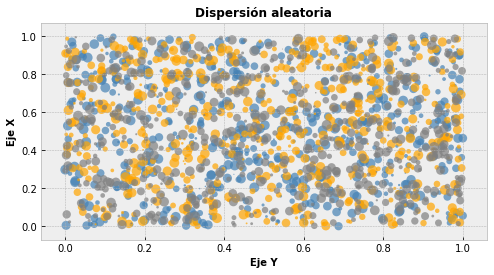

In [2]:
fig, ax = plt.subplots(figsize=[8,4])

for color in ['steelblue', 'orange', 'grey']:
    n = 600
    x,y = rand(2,n)
    scale = 100 * rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color, alpha= 0.7, edgecolors = 'none')
    
ax.grid(True)

plt.xlabel('Eje Y', fontsize = 10, weight = 'semibold')
plt.ylabel('Eje X', fontsize = 10, weight = 'semibold')
plt.title('Dispersión aleatoria', fontsize=12, weight = 'semibold')

plt.savefig('g.png', dpi=80)

plt.show()

### Construcción del objeto canvas, guardado en formato PDF

In [3]:
fecha = datetime.datetime.now()
fecha = fecha.strftime("Fecha y hora: %d-%m-%Y, %H:%M")

canvas = canvas.Canvas("Reporte PDF.pdf", pagesize = letter)
canvas.setFont('Helvetica',20)

canvas.drawString(300,650, 'Título')
canvas.drawString(285,590, 'Subtítulo')

canvas.drawImage('g.png',1, 200, None, None)

canvas.drawString(310,20, fecha)

canvas.showPage()
canvas.save()